# 1. Introduction

a. Churn prediction aims to detect customers intended to leave a service provider.

b. Prediction models are used to identify customers who are likely to churn.

Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank_churn.csv', delimiter=';')
df.shape

(10000, 12)

In [3]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [4]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [5]:
df=df.drop(["customer_id"], axis=1)

In [6]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


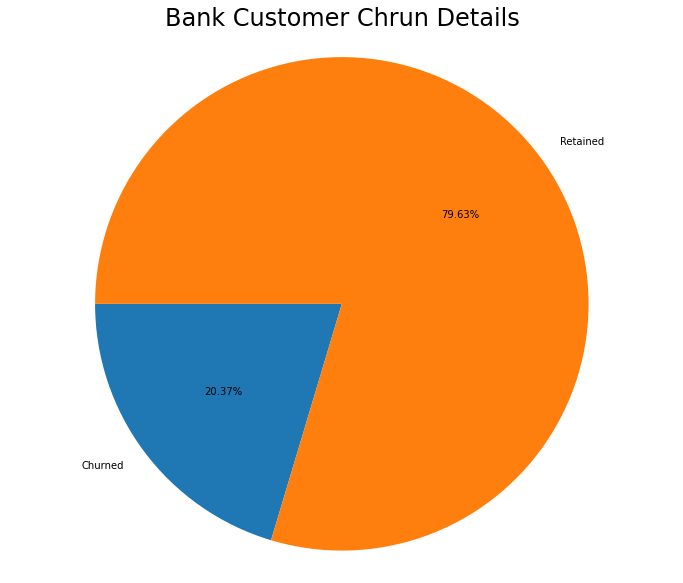

In [7]:
labels='Churned', 'Retained'
status = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode=(0, 0)
fig1, status1=plt.subplots(figsize=(12, 10))
status1.pie(status, explode=explode, labels=labels, autopct='%2.2f%%', shadow=False, startangle=180)
status1.axis('equal')
plt.title('Bank Customer Chrun Details', size=24)
plt.show()

<AxesSubplot:xlabel='active_member', ylabel='count'>

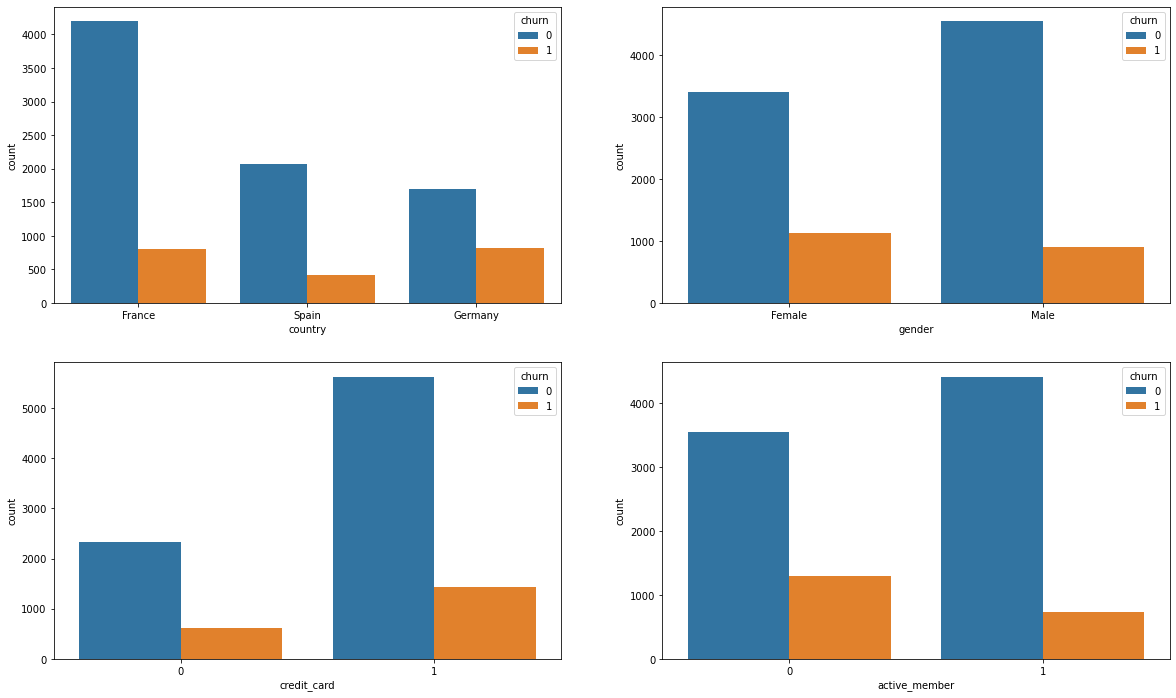

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='country', hue = 'churn',data = df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[1][1])

* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

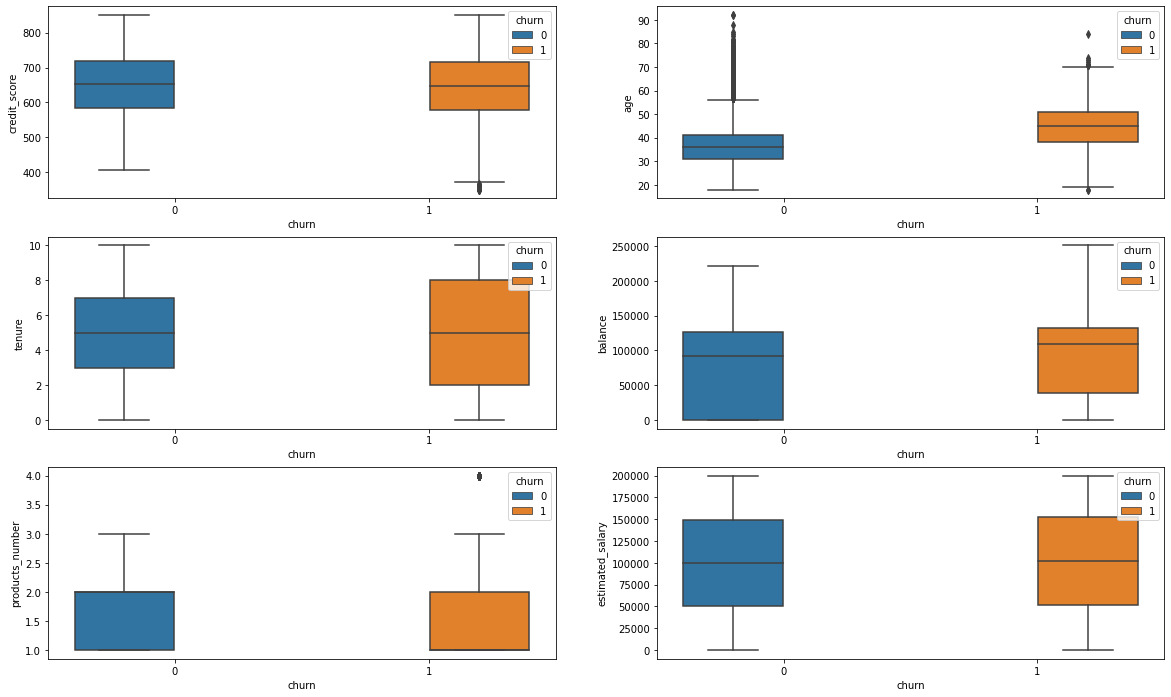

In [9]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df, ax=axarr[2][1])

# Pre-processing and Training Data Development

In [10]:
x=df[['credit_score', 'country', 'gender', 'age','balance','products_number', 'active_member']]
y=df["churn"]

In [11]:
from sklearn.preprocessing import LabelEncoder
lel = LabelEncoder()
x["gender"]= lel.fit_transform(x["gender"])
x.head()

<ipython-input-11-8078a4ad8520>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["gender"]= lel.fit_transform(x["gender"])


,credit_score,country,gender,age,balance,products_number,active_member
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("encoder",OneHotEncoder(),[1])],remainder="passthrough")
x = ct.fit_transform(x)

In [14]:
x.shape
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,619.0,0.0,42.0,0.00,1.0,1.0
1,0.0,0.0,1.0,608.0,0.0,41.0,83807.86,1.0,1.0
2,1.0,0.0,0.0,502.0,0.0,42.0,159660.80,3.0,0.0
3,1.0,0.0,0.0,699.0,0.0,39.0,0.00,2.0,0.0
4,0.0,0.0,1.0,850.0,0.0,43.0,125510.82,1.0,1.0


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)
print(x.shape)
print(xtr.shape)
print(xts.shape)

(10000, 9)
(8000, 9)
(2000, 9)


# Modelling

In [17]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(xtr,ytr)

LogisticRegression()

In [18]:
ypred = model.predict(xts)
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.8175

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 3)
model2.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=3)

In [20]:
ypred2=model2.predict(xts)
metrics.accuracy_score(yts,ypred2)

0.8285

In [21]:
metrics.recall_score(yts,ypred2)

0.4910025706940874

In [22]:
from sklearn.tree import DecisionTreeClassifier
model3= DecisionTreeClassifier(criterion="gini")
model3.fit(xtr,ytr)

DecisionTreeClassifier()

In [23]:
ypred3=model3.predict(xts)
metrics.accuracy_score(yts,ypred3)

0.798

In [24]:
metrics.recall_score(yts,ypred3)

0.5501285347043702

In [25]:
metrics.recall_score(ytr,model3.predict(xtr))

1.0

In [26]:
from sklearn.tree import DecisionTreeClassifier
model3= DecisionTreeClassifier(criterion="gini",max_depth=8,min_samples_leaf=10)
model3.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)

In [27]:
ypred3=model3.predict(xts)
metrics.accuracy_score(yts,ypred3)

0.861

In [28]:
metrics.recall_score(yts,ypred3)

0.5501285347043702

In [29]:
metrics.recall_score(ytr,model3.predict(xtr))

0.5345873786407767

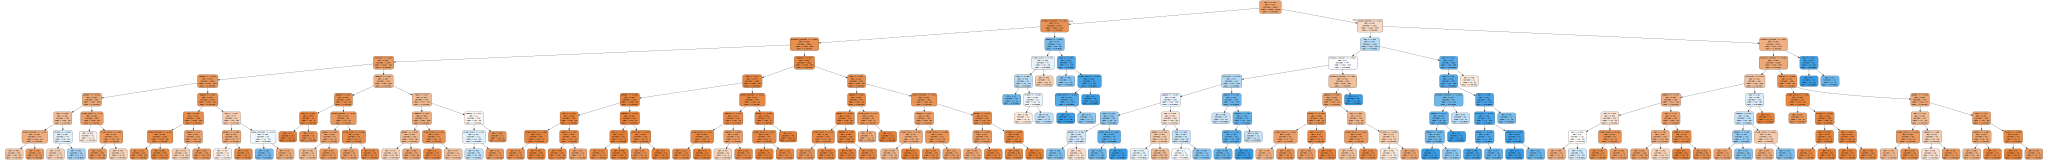

In [34]:
import graphviz
from sklearn import tree
fname=['France','Germany','Spain','credit_score','gender','age','balance','products_number','active_member']
cname=['Churned', 'Retained']
graph_data = tree.export_graphviz(model3,out_file=None,feature_names=fname,class_names=cname,filled=True,rounded=True)
graph=graphviz.Source(graph_data)
graph